# Test the Lips Segmentation Models

1.   List item
2.   List item



  Lips Segmentation (128,128,2):

    - There are 11 trained models, from Epoch5-11, Keras ang Tflite formats are
      available. In Epoch 12-16, TF2, Keras, and Tflite formats are available.
      All models will be uploaded on Gitlab to facilitate an easier selection 
      of models
    - Time Spent Training: 11+ hours


  Lips Segmentation 3 channels (128,128,3):
  
  - This model will be trained up to 20 epochs.
  - Estimated time spent in training: 12+ hours:


  Lips Segmentation 6k samples (256, 256, 3):

  - Google colab can't handle the training using 28k samples. It crashes because all of the 13gb ram available is spent at around 100/357 steps on epoch 1.
  - As such, to solve this problem, I decided to downsize the sample. For the training of this batch of models, I only used 6k samples.
  - Maybe google colab Pro or Pro+ will be able to train the model using 28k samples.
  - Estimated time spent in training: 13+ hours


  Lips Segmentation 8k samples (256, 256, 3):

  - This is the limit of training on google colab free version. If we increase the number of samples, the 13gb of RAM will not be able to handle the training
  - Estimated time spent in training: 13+ hours


  Lips Segmentation New Dataset 5k samples (256, 256, 3):

  - In this model batch, I used the dataset that I have generated. It contains an equal amount of female and male faces.

## IMPORTS

In [1]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import tensorflow
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt

import numpy as np
import cv2

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

## Needed Functions

In [5]:
def prepare_image ( IMAGE_PATH, PIXEL_SIZE = 128, TYPE = "float32" ):
  x = cv2.imread( IMAGE_PATH, cv2.IMREAD_COLOR)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
  x = cv2.resize(x, (PIXEL_SIZE, PIXEL_SIZE))
  x = x / 255.0
  if TYPE == "float32":
    x = x.astype(np.float32)
  elif TYPE == "uint8":
    x = x.astype(np.uint8)
  x = np.expand_dims(x, axis=0)
  return x

def display(display_list, title = ['Input Image', '128, 128, 2', '128, 128, 3', '256, 256, 3', "8k", "ND 5k"]):
  plt.figure(figsize=(15, 15))

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [6]:
def tflite_infer( inputModel, inputImage):
  # Load the TFLite model and allocate tensors.
  inputModel.allocate_tensors()

  # Get input and output tensors.
  inputModel_inputDetails = inputModel.get_input_details()
  inputModel_outputDetails = inputModel.get_output_details()

  # Invoke the model on the input data
  inputModel.set_tensor(inputModel_inputDetails[0]['index'], inputImage)
  inputModel.invoke()

  # Get the result 
  output_data = inputModel.get_tensor(inputModel_outputDetails[0]['index'])
  return output_data

## Image Paths

In [7]:
image1_path = "/content/drive/MyDrive/Colab Notebooks/Faces/Rahms.jpg"
image2_path = "/content/drive/MyDrive/Colab Notebooks/Faces/cao_cao.png"
image3_path = "/content/drive/MyDrive/Colab Notebooks/Faces/MannyPacquaio.jpg"
image4_path = "/content/drive/MyDrive/Colab Notebooks/Faces/LeeKuanYew.jpg"

female1_path = "/content/drive/MyDrive/Colab Notebooks/Faces/female1.jpg"
female2_path = "/content/drive/MyDrive/Colab Notebooks/Faces/female2.jpg"
female3_path = "/content/drive/MyDrive/Colab Notebooks/Faces/female3.jpg"
female4_path = "/content/drive/MyDrive/Colab Notebooks/Faces/female4.jpg"

In [8]:
# 128, 128
image1 = prepare_image(image1_path)
image2 = prepare_image(image2_path)
image3 = prepare_image(image3_path)
image4 = prepare_image(image4_path)

female1 = prepare_image(female1_path)
female2 = prepare_image(female2_path)
female3 = prepare_image(female3_path)
female4 = prepare_image(female4_path)


In [9]:
# 256, 256
image1_256 = prepare_image(image1_path, 256)
image2_256 = prepare_image(image2_path, 256)
image3_256 = prepare_image(image3_path, 256)
image4_256 = prepare_image(image4_path, 256)

female1_256 = prepare_image(female1_path, 256)
female2_256 = prepare_image(female2_path, 256)
female3_256 = prepare_image(female3_path, 256)
female4_256 = prepare_image(female4_path, 256)

# 256, uint8
image1_uint8 = prepare_image(image1_path, 256, "uint8")
image2_uint8 = prepare_image(image2_path, 256, "uint8")
image3_uint8 = prepare_image(image3_path, 256, "uint8")
image4_uint8 = prepare_image(image4_path, 256, "uint8")

female1_uint8 = prepare_image(female1_path, 256, "uint8")
female2_uint8 = prepare_image(female2_path, 256, "uint8")
female3_uint8 = prepare_image(female3_path, 256, "uint8")
female4_uint8 = prepare_image(female4_path, 256, "uint8")


## Keras Model Tests

### Model Paths

In [10]:
# 2 channels. Output Shape of None, 128, 128, 2 (28k samples)
model5_path = "/content/drive/MyDrive/Trained-Models/Epoch5/Keras/Lips_Segmentation_Model_Epoch5.h5"
model6_path = "/content/drive/MyDrive/Trained-Models/Epoch6/Keras/Lips_Segmentation_Model_Epoch6.h5"
model7_path = "/content/drive/MyDrive/Trained-Models/Epoch7/Keras/Lips_Segmentation_Model_Epoch7.h5"
model8_path = "/content/drive/MyDrive/Trained-Models/Epoch8/Keras/Lips_Segmentation_Model_Epoch8.h5"
model9_path = "/content/drive/MyDrive/Trained-Models/Epoch9/Keras/Lips_Segmentation_Model_Epoch9.h5"
model10_path = "/content/drive/MyDrive/Trained-Models/Epoch10/Keras/Lips_Segmentation_Model_Epoch10.h5"
model11_path = "/content/drive/MyDrive/Trained-Models/Epoch11/Keras/Lips_Segmentation_Model_Epoch11.h5"
model12_path = "/content/drive/MyDrive/Trained-Models/Epoch12/Keras/Lips_Segmentation_Model_Epoch12.h5"
model13_path = "/content/drive/MyDrive/Trained-Models/Epoch13/Keras/Lips_Segmentation_Model_Epoch13.h5"
model14_path = "/content/drive/MyDrive/Trained-Models/Epoch14/Keras/Lips_Segmentation_Model_Epoch14.h5"
model15_path = "/content/drive/MyDrive/Trained-Models/Epoch15/Keras/Lips_Segmentation_Model_Epoch15.h5"
model16_path = "/content/drive/MyDrive/Trained-Models/Epoch16/Keras/Lips_Segmentation_Model_Epoch16.h5"


# 3 channels. Output Shape of None, 128, 128, 3 (28k samples)
model5_3c_path = "/content/drive/MyDrive/Trained-Models/Epoch5/Keras/Lips_Segmentation_Model_Epoch5_3channels.h5"
model10_3c_path = "/content/drive/MyDrive/Trained-Models/Epoch10/Keras/Lips_Segmentation_Model_Epoch10_3channels.h5"
model15_3c_path = "/content/drive/MyDrive/Trained-Models/Epoch15/Keras/Lips_Segmentation_Model_Epoch15_3channels.h5"
model20_3c_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Keras/Lips_Segmentation_Model_Epoch20_3channels.h5"

# Output Shape of None, 256, 256, 3 ( Used 6k samples )
model5_256_path = "/content/drive/MyDrive/Trained-Models/Epoch5/Keras/Lips_Segmentation_Model_Epoch5_256.h5"
model10_256_path = "/content/drive/MyDrive/Trained-Models/Epoch10/Keras/Lips_Segmentation_Model_Epoch10_256.h5"
model15_256_path = "/content/drive/MyDrive/Trained-Models/Epoch15/Keras/Lips_Segmentation_Model_Epoch15_256.h5"
model20_256_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Keras/Lips_Segmentation_Model_Epoch20_256.h5"


# Output Shape of None, 256, 256, 3 ( Used 6k samples )
model5_8k_path = "/content/drive/MyDrive/Trained-Models/Epoch5/Keras/Lips_Segmentation_Model_Epoch5_8k.h5"
model10_8k_path = "/content/drive/MyDrive/Trained-Models/Epoch10/Keras/Lips_Segmentation_Model_Epoch10_8k.h5"
model15_8k_path = "/content/drive/MyDrive/Trained-Models/Epoch15/Keras/Lips_Segmentation_Model_Epoch15_8k.h5"
model20_8k_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Keras/Lips_Segmentation_Model_Epoch20_8k.h5"

# Output Shape of None, 256, 256, 3 New Dataset( Used 5k samples )
model5_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch5/Keras/Lips_Segmentation_Model_Epoch5_ND_5k.h5"
model10_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch10/Keras/Lips_Segmentation_Model_Epoch10_ND_5k.h5"
model15_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch15/Keras/Lips_Segmentation_Model_Epoch15_ND_5k.h5"
model20_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Keras/Lips_Segmentation_Model_Epoch20_ND_5k.h5"

model25_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch25/Keras/Lips_Segmentation_Model_Epoch25_ND_5k.h5"
model30_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch30/Keras/Lips_Segmentation_Model_Epoch30_ND_5k.h5"
#model35_ND_5k_path = "/content/drive/MyDrive/Trained-Models/Epoch35/Keras/Lips_Segmentation_Model_Epoch35_ND_5k.h5"

# Pruned model
model20_ND_prunedQuant2_path = "/content/drive/MyDrive/Trained-Models/Pruning/Quantize/Lips_Segmentation_Epoch20_Compressed_prunedQuant2.h5"

### Needed Functions

In [11]:
def prepare_image ( IMAGE_PATH, PIXEL_SIZE = 128 ):
  x = cv2.imread( IMAGE_PATH, cv2.IMREAD_COLOR)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
  x = cv2.resize(x, (PIXEL_SIZE, PIXEL_SIZE))
  x = x / 255.0
  x = x.astype(np.float32)
  x = np.expand_dims(x, axis=0)
  return x

def display(display_list, title = ['Input Image', '128, 128, 2', '128, 128, 3', '256, 256, 3', "8k", "ND 5k"]):
  plt.figure(figsize=(15, 15))

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [12]:
# 128, 128
image1 = prepare_image(image1_path)
image2 = prepare_image(image2_path)
image3 = prepare_image(image3_path)
image4 = prepare_image(image4_path)

female1 = prepare_image(female1_path)
female2 = prepare_image(female2_path)
female3 = prepare_image(female3_path)
female4 = prepare_image(female4_path)

# 256, 256
image1_256 = prepare_image(image1_path, 256)
image2_256 = prepare_image(image2_path, 256)
image3_256 = prepare_image(image3_path, 256)
image4_256 = prepare_image(image4_path, 256)

female1_256 = prepare_image(female1_path, 256)
female2_256 = prepare_image(female2_path, 256)
female3_256 = prepare_image(female3_path, 256)
female4_256 = prepare_image(female4_path, 256)


### Model Epoch 5

In [13]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer
model5 = tf.keras.models.load_model(model5_path)

model5_3c = tf.keras.models.load_model(model5_3c_path)

model5_256 = tf.keras.models.load_model(model5_256_path)

model5_8k = tf.keras.models.load_model(model5_8k_path)

model5_ND_5k = tf.keras.models.load_model(model5_ND_5k_path)

In [14]:
# Male
pred_image1 = model5.predict(image1)
pred_image2 = model5.predict(image2)
pred_image3 = model5.predict(image3)
pred_image4 = model5.predict(image4)

pred_image1_3c = model5_3c.predict(image1)
pred_image2_3c = model5_3c.predict(image2)
pred_image3_3c = model5_3c.predict(image3)
pred_image4_3c = model5_3c.predict(image4)

pred_image1_256 = model5_256.predict(image1_256)
pred_image2_256 = model5_256.predict(image2_256)
pred_image3_256 = model5_256.predict(image3_256)
pred_image4_256 = model5_256.predict(image4_256)

pred_image1_8k = model5_8k.predict(image1_256)
pred_image2_8k = model5_8k.predict(image2_256)
pred_image3_8k = model5_8k.predict(image3_256)
pred_image4_8k = model5_8k.predict(image4_256)

pred_image1_ND_5k = model5_ND_5k.predict(image1_256)
pred_image2_ND_5k = model5_ND_5k.predict(image2_256)
pred_image3_ND_5k = model5_ND_5k.predict(image3_256)
pred_image4_ND_5k = model5_ND_5k.predict(image4_256)



# Female
pred_female1 = model5.predict(female1)
pred_female2 = model5.predict(female2)
pred_female3 = model5.predict(female3)
pred_female4 = model5.predict(female4)

pred_female1_3c = model5_3c.predict(female1)
pred_female2_3c = model5_3c.predict(female2)
pred_female3_3c = model5_3c.predict(female3)
pred_female4_3c = model5_3c.predict(female4)

pred_female1_256 = model5_256.predict(female1_256)
pred_female2_256 = model5_256.predict(female2_256)
pred_female3_256 = model5_256.predict(female3_256)
pred_female4_256 = model5_256.predict(female4_256)

pred_female1_8k = model5_8k.predict(female1_256)
pred_female2_8k = model5_8k.predict(female2_256)
pred_female3_8k = model5_8k.predict(female3_256)
pred_female4_8k = model5_8k.predict(female4_256)

pred_female1_ND_5k = model5_ND_5k.predict(female1_256)
pred_female2_ND_5k = model5_ND_5k.predict(female2_256)
pred_female3_ND_5k = model5_ND_5k.predict(female3_256)
pred_female4_ND_5k = model5_ND_5k.predict(female4_256)

In [15]:
# Male
pred_image1 = create_mask(pred_image1)
pred_image2 = create_mask(pred_image2)
pred_image3 = create_mask(pred_image3)
pred_image4 = create_mask(pred_image4)

pred_image1_3c = create_mask(pred_image1_3c)
pred_image2_3c = create_mask(pred_image2_3c)
pred_image3_3c = create_mask(pred_image3_3c)
pred_image4_3c = create_mask(pred_image4_3c)

pred_image1_256 = create_mask(pred_image1_256)
pred_image2_256 = create_mask(pred_image2_256)
pred_image3_256 = create_mask(pred_image3_256)
pred_image4_256 = create_mask(pred_image4_256)

pred_image1_8k = create_mask(pred_image1_8k)
pred_image2_8k = create_mask(pred_image2_8k)
pred_image3_8k = create_mask(pred_image3_8k)
pred_image4_8k = create_mask(pred_image4_8k)

pred_image1_ND_5k = create_mask(pred_image1_ND_5k)
pred_image2_ND_5k = create_mask(pred_image2_ND_5k)
pred_image3_ND_5k = create_mask(pred_image3_ND_5k)
pred_image4_ND_5k = create_mask(pred_image4_ND_5k)

# Female
pred_female1 = create_mask(pred_female1)
pred_female2 = create_mask(pred_female2)
pred_female3 = create_mask(pred_female3)
pred_female4 = create_mask(pred_female4)

pred_female1_3c = create_mask(pred_female1_3c)
pred_female2_3c = create_mask(pred_female2_3c)
pred_female3_3c = create_mask(pred_female3_3c)
pred_female4_3c = create_mask(pred_female4_3c)

pred_female1_256 = create_mask(pred_female1_256)
pred_female2_256 = create_mask(pred_female2_256)
pred_female3_256 = create_mask(pred_female3_256)
pred_female4_256 = create_mask(pred_female4_256)

pred_female1_8k = create_mask(pred_female1_8k)
pred_female2_8k = create_mask(pred_female2_8k)
pred_female3_8k = create_mask(pred_female3_8k)
pred_female4_8k = create_mask(pred_female4_8k)

pred_female1_ND_5k = create_mask(pred_female1_ND_5k)
pred_female2_ND_5k = create_mask(pred_female2_ND_5k)
pred_female3_ND_5k = create_mask(pred_female3_ND_5k)
pred_female4_ND_5k = create_mask(pred_female4_ND_5k)

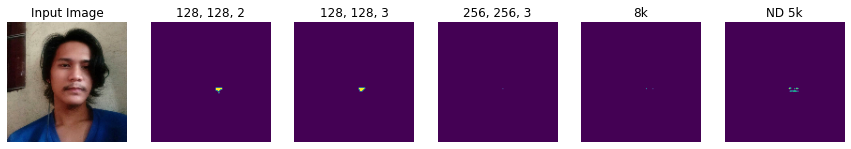

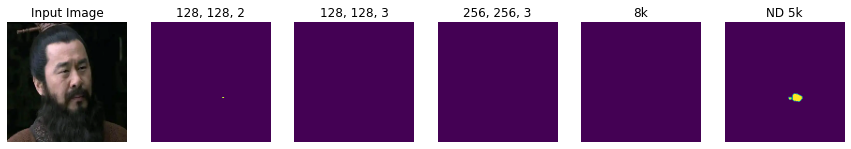

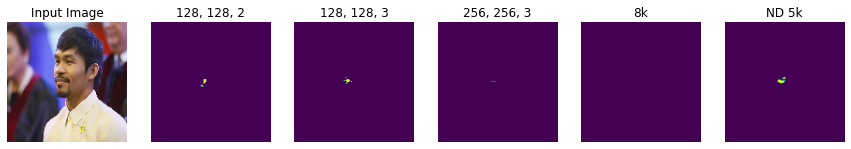

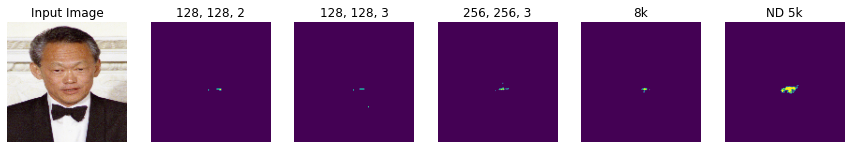

In [16]:
# Epoch 5 prediction result ( Male )
display( [image1.squeeze(), pred_image1, pred_image1_3c, pred_image1_256, pred_image1_8k, pred_image1_ND_5k] )
display( [image2.squeeze(), pred_image2, pred_image2_3c, pred_image2_256, pred_image2_8k, pred_image2_ND_5k] )
display( [image3.squeeze(), pred_image3, pred_image3_3c, pred_image3_256, pred_image3_8k, pred_image3_ND_5k] )
display( [image4.squeeze(), pred_image4, pred_image4_3c, pred_image4_256, pred_image4_8k, pred_image4_ND_5k] )

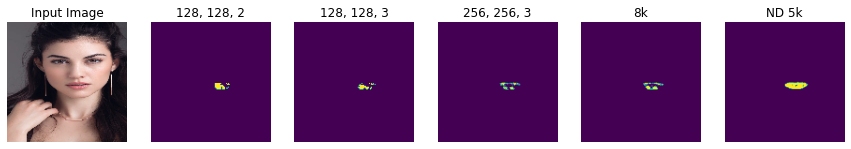

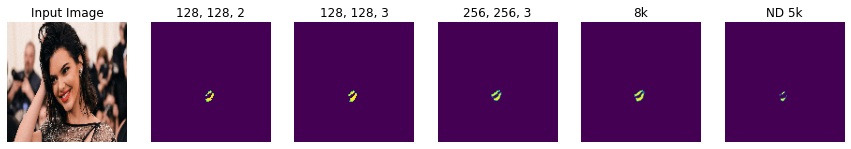

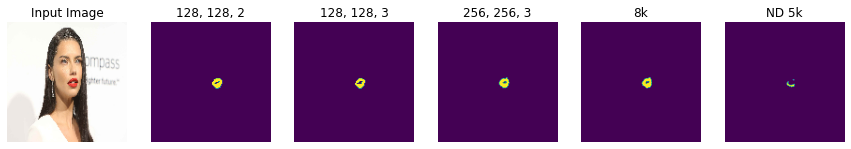

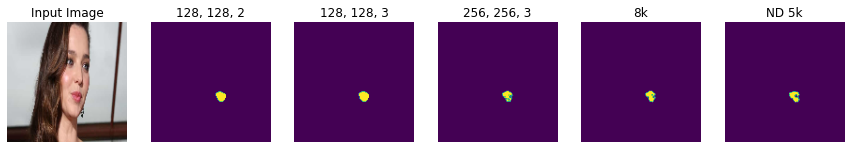

In [17]:
# Epoch 5 prediction result ( Female )
display( [female1.squeeze(), pred_female1, pred_female1_3c, pred_female1_256, pred_female1_8k, pred_female1_ND_5k] )
display( [female2.squeeze(), pred_female2, pred_female2_3c, pred_female2_256, pred_female2_8k, pred_female2_ND_5k] )
display( [female3.squeeze(), pred_female3, pred_female3_3c, pred_female3_256, pred_female3_8k, pred_female3_ND_5k] )
display( [female4.squeeze(), pred_female4, pred_female4_3c, pred_female4_256, pred_female4_8k, pred_female4_ND_5k] )

### Model Epoch 10

In [18]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer
model10 = tf.keras.models.load_model(model10_path)

model10_3c = tf.keras.models.load_model(model10_3c_path)

model10_256 = tf.keras.models.load_model(model10_256_path)

model10_8k = tf.keras.models.load_model(model10_8k_path)

model10_ND_5k = tf.keras.models.load_model(model10_ND_5k_path)

In [19]:
# Male
pred_image1 = model10.predict(image1)
pred_image2 = model10.predict(image2)
pred_image3 = model10.predict(image3)
pred_image4 = model10.predict(image4)

pred_image1_3c = model10_3c.predict(image1)
pred_image2_3c = model10_3c.predict(image2)
pred_image3_3c = model10_3c.predict(image3)
pred_image4_3c = model10_3c.predict(image4)

pred_image1_256 = model10_256.predict(image1_256)
pred_image2_256 = model10_256.predict(image2_256)
pred_image3_256 = model10_256.predict(image3_256)
pred_image4_256 = model10_256.predict(image4_256)

pred_image1_8k = model10_8k.predict(image1_256)
pred_image2_8k = model10_8k.predict(image2_256)
pred_image3_8k = model10_8k.predict(image3_256)
pred_image4_8k = model10_8k.predict(image4_256)

pred_image1_ND_5k = model10_ND_5k.predict(image1_256)
pred_image2_ND_5k = model10_ND_5k.predict(image2_256)
pred_image3_ND_5k = model10_ND_5k.predict(image3_256)
pred_image4_ND_5k = model10_ND_5k.predict(image4_256)

#Female
pred_female1 = model10.predict(female1)
pred_female2 = model10.predict(female2)
pred_female3 = model10.predict(female3)
pred_female4 = model10.predict(female4)

pred_female1_3c = model10_3c.predict(female1)
pred_female2_3c = model10_3c.predict(female2)
pred_female3_3c = model10_3c.predict(female3)
pred_female4_3c = model10_3c.predict(female4)

pred_female1_256 = model10_256.predict(female1_256)
pred_female2_256 = model10_256.predict(female2_256)
pred_female3_256 = model10_256.predict(female3_256)
pred_female4_256 = model10_256.predict(female4_256)

pred_female1_8k = model10_8k.predict(female1_256)
pred_female2_8k = model10_8k.predict(female2_256)
pred_female3_8k = model10_8k.predict(female3_256)
pred_female4_8k = model10_8k.predict(female4_256)

pred_female1_ND_5k = model10_ND_5k.predict(female1_256)
pred_female2_ND_5k = model10_ND_5k.predict(female2_256)
pred_female3_ND_5k = model10_ND_5k.predict(female3_256)
pred_female4_ND_5k = model10_ND_5k.predict(female4_256)

In [20]:
# Male
pred_image1 = create_mask(pred_image1)
pred_image2 = create_mask(pred_image2)
pred_image3 = create_mask(pred_image3)
pred_image4 = create_mask(pred_image4)

pred_image1_3c = create_mask(pred_image1_3c)
pred_image2_3c = create_mask(pred_image2_3c)
pred_image3_3c = create_mask(pred_image3_3c)
pred_image4_3c = create_mask(pred_image4_3c)

pred_image1_256 = create_mask(pred_image1_256)
pred_image2_256 = create_mask(pred_image2_256)
pred_image3_256 = create_mask(pred_image3_256)
pred_image4_256 = create_mask(pred_image4_256)

pred_image1_8k = create_mask(pred_image1_8k)
pred_image2_8k = create_mask(pred_image2_8k)
pred_image3_8k = create_mask(pred_image3_8k)
pred_image4_8k = create_mask(pred_image4_8k)

pred_image1_ND_5k = create_mask(pred_image1_ND_5k)
pred_image2_ND_5k = create_mask(pred_image2_ND_5k)
pred_image3_ND_5k = create_mask(pred_image3_ND_5k)
pred_image4_ND_5k = create_mask(pred_image4_ND_5k)


# Female
pred_female1 = create_mask(pred_female1)
pred_female2 = create_mask(pred_female2)
pred_female3 = create_mask(pred_female3)
pred_female4 = create_mask(pred_female4)

pred_female1_3c = create_mask(pred_female1_3c)
pred_female2_3c = create_mask(pred_female2_3c)
pred_female3_3c = create_mask(pred_female3_3c)
pred_female4_3c = create_mask(pred_female4_3c)

pred_female1_256 = create_mask(pred_female1_256)
pred_female2_256 = create_mask(pred_female2_256)
pred_female3_256 = create_mask(pred_female3_256)
pred_female4_256 = create_mask(pred_female4_256)

pred_female1_8k = create_mask(pred_female1_8k)
pred_female2_8k = create_mask(pred_female2_8k)
pred_female3_8k = create_mask(pred_female3_8k)
pred_female4_8k = create_mask(pred_female4_8k)

pred_female1_ND_5k = create_mask(pred_female1_ND_5k)
pred_female2_ND_5k = create_mask(pred_female2_ND_5k)
pred_female3_ND_5k = create_mask(pred_female3_ND_5k)
pred_female4_ND_5k = create_mask(pred_female4_ND_5k)

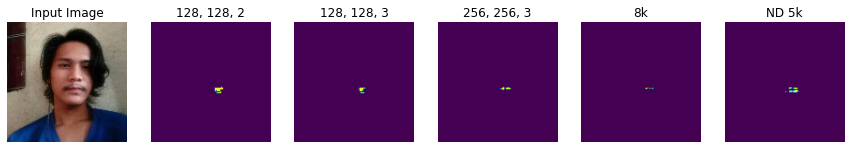

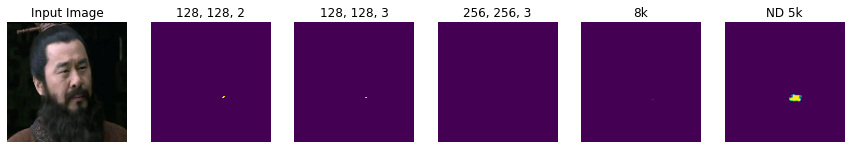

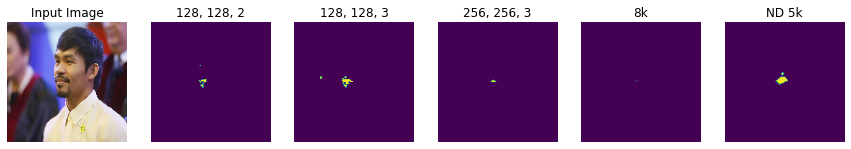

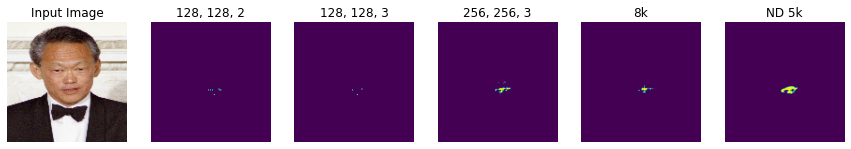

In [21]:
# Epoch 10 prediction result ( Male )
display( [image1.squeeze(), pred_image1, pred_image1_3c, pred_image1_256, pred_image1_8k, pred_image1_ND_5k] )
display( [image2.squeeze(), pred_image2, pred_image2_3c, pred_image2_256, pred_image2_8k, pred_image2_ND_5k] )
display( [image3.squeeze(), pred_image3, pred_image3_3c, pred_image3_256, pred_image3_8k, pred_image3_ND_5k] )
display( [image4.squeeze(), pred_image4, pred_image4_3c, pred_image4_256, pred_image4_8k, pred_image4_ND_5k] )


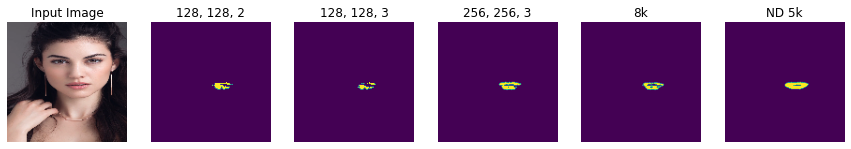

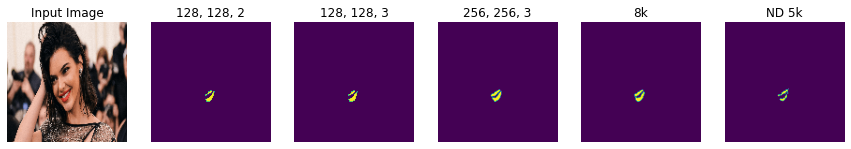

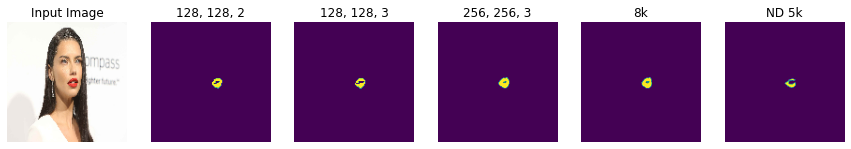

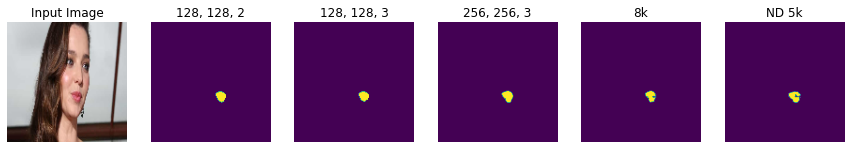

In [22]:
# Epoch 10 prediction result ( Female )
display( [female1.squeeze(), pred_female1, pred_female1_3c, pred_female1_256, pred_female1_8k, pred_female1_ND_5k] )
display( [female2.squeeze(), pred_female2, pred_female2_3c, pred_female2_256, pred_female2_8k, pred_female2_ND_5k] )
display( [female3.squeeze(), pred_female3, pred_female3_3c, pred_female3_256, pred_female3_8k, pred_female3_ND_5k] )
display( [female4.squeeze(), pred_female4, pred_female4_3c, pred_female4_256, pred_female4_8k, pred_female4_ND_5k] )

### Model Epoch 15

In [23]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer
model15 = tf.keras.models.load_model(model15_path)

model15_3c = tf.keras.models.load_model(model15_3c_path)

model15_256 = tf.keras.models.load_model(model15_256_path)

model15_8k = tf.keras.models.load_model(model15_8k_path)

model15_ND_5k = tf.keras.models.load_model(model15_ND_5k_path)

In [24]:
# Male
pred_image1 = model15.predict(image1)
pred_image2 = model15.predict(image2)
pred_image3 = model15.predict(image3)
pred_image4 = model15.predict(image4)

pred_image1_3c = model15_3c.predict(image1)
pred_image2_3c = model15_3c.predict(image2)
pred_image3_3c = model15_3c.predict(image3)
pred_image4_3c = model15_3c.predict(image4)

pred_image1_256 = model15_256.predict(image1_256)
pred_image2_256 = model15_256.predict(image2_256)
pred_image3_256 = model15_256.predict(image3_256)
pred_image4_256 = model15_256.predict(image4_256)

pred_image1_8k = model15_8k.predict(image1_256)
pred_image2_8k = model15_8k.predict(image2_256)
pred_image3_8k = model15_8k.predict(image3_256)
pred_image4_8k = model15_8k.predict(image4_256)

pred_image1_ND_5k = model15_ND_5k.predict(image1_256)
pred_image2_ND_5k = model15_ND_5k.predict(image2_256)
pred_image3_ND_5k = model15_ND_5k.predict(image3_256)
pred_image4_ND_5k = model15_ND_5k.predict(image4_256)


#Female
pred_female1 = model15.predict(female1)
pred_female2 = model15.predict(female2)
pred_female3 = model15.predict(female3)
pred_female4 = model15.predict(female4)

pred_female1_3c = model15_3c.predict(female1)
pred_female2_3c = model15_3c.predict(female2)
pred_female3_3c = model15_3c.predict(female3)
pred_female4_3c = model15_3c.predict(female4)

pred_female1_256 = model15_256.predict(female1_256)
pred_female2_256 = model15_256.predict(female2_256)
pred_female3_256 = model15_256.predict(female3_256)
pred_female4_256 = model15_256.predict(female4_256)

pred_female1_8k = model15_8k.predict(female1_256)
pred_female2_8k = model15_8k.predict(female2_256)
pred_female3_8k = model15_8k.predict(female3_256)
pred_female4_8k = model15_8k.predict(female4_256)

pred_female1_ND_5k = model15_ND_5k.predict(female1_256)
pred_female2_ND_5k = model15_ND_5k.predict(female2_256)
pred_female3_ND_5k = model15_ND_5k.predict(female3_256)
pred_female4_ND_5k = model15_ND_5k.predict(female4_256)

In [25]:
# Male
pred_image1 = create_mask(pred_image1)
pred_image2 = create_mask(pred_image2)
pred_image3 = create_mask(pred_image3)
pred_image4 = create_mask(pred_image4)

pred_image1_3c = create_mask(pred_image1_3c)
pred_image2_3c = create_mask(pred_image2_3c)
pred_image3_3c = create_mask(pred_image3_3c)
pred_image4_3c = create_mask(pred_image4_3c)

pred_image1_256 = create_mask(pred_image1_256)
pred_image2_256 = create_mask(pred_image2_256)
pred_image3_256 = create_mask(pred_image3_256)
pred_image4_256 = create_mask(pred_image4_256)

pred_image1_8k = create_mask(pred_image1_8k)
pred_image2_8k = create_mask(pred_image2_8k)
pred_image3_8k = create_mask(pred_image3_8k)
pred_image4_8k = create_mask(pred_image4_8k)

pred_image1_ND_5k = create_mask(pred_image1_ND_5k)
pred_image2_ND_5k = create_mask(pred_image2_ND_5k)
pred_image3_ND_5k = create_mask(pred_image3_ND_5k)
pred_image4_ND_5k = create_mask(pred_image4_ND_5k)

# Female
pred_female1 = create_mask(pred_female1)
pred_female2 = create_mask(pred_female2)
pred_female3 = create_mask(pred_female3)
pred_female4 = create_mask(pred_female4)

pred_female1_3c = create_mask(pred_female1_3c)
pred_female2_3c = create_mask(pred_female2_3c)
pred_female3_3c = create_mask(pred_female3_3c)
pred_female4_3c = create_mask(pred_female4_3c)

pred_female1_256 = create_mask(pred_female1_256)
pred_female2_256 = create_mask(pred_female2_256)
pred_female3_256 = create_mask(pred_female3_256)
pred_female4_256 = create_mask(pred_female4_256)

pred_female1_8k = create_mask(pred_female1_8k)
pred_female2_8k = create_mask(pred_female2_8k)
pred_female3_8k = create_mask(pred_female3_8k)
pred_female4_8k = create_mask(pred_female4_8k)

pred_female1_ND_5k = create_mask(pred_female1_ND_5k)
pred_female2_ND_5k = create_mask(pred_female2_ND_5k)
pred_female3_ND_5k = create_mask(pred_female3_ND_5k)
pred_female4_ND_5k = create_mask(pred_female4_ND_5k)

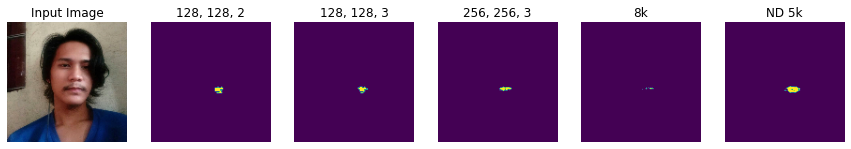

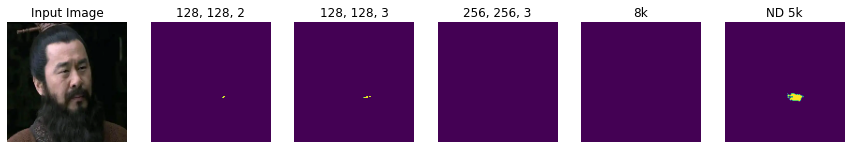

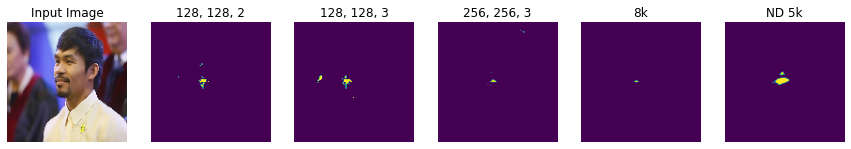

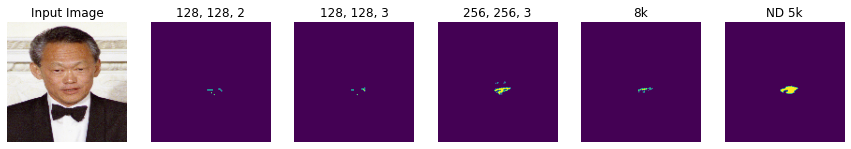

In [26]:
# Epoch 15 prediction result ( Male )
display( [image1.squeeze(), pred_image1, pred_image1_3c, pred_image1_256, pred_image1_8k, pred_image1_ND_5k] )
display( [image2.squeeze(), pred_image2, pred_image2_3c, pred_image2_256, pred_image2_8k, pred_image2_ND_5k] )
display( [image3.squeeze(), pred_image3, pred_image3_3c, pred_image3_256, pred_image3_8k, pred_image3_ND_5k] )
display( [image4.squeeze(), pred_image4, pred_image4_3c, pred_image4_256, pred_image4_8k, pred_image4_ND_5k] )

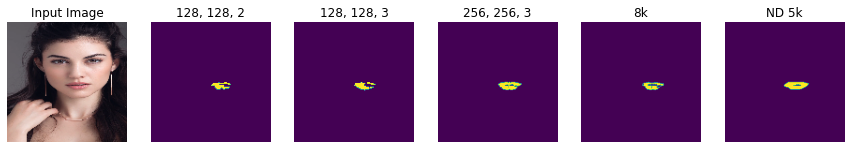

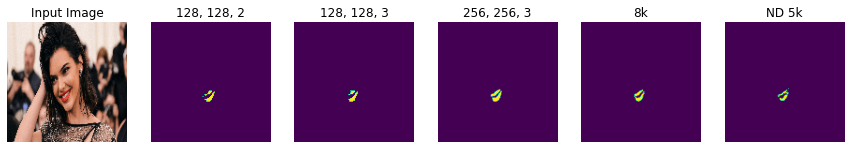

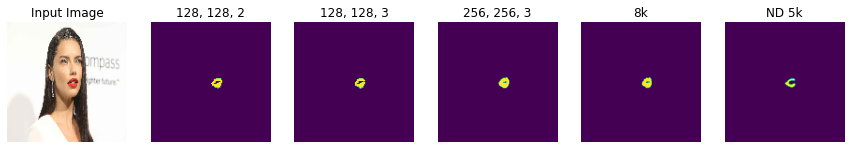

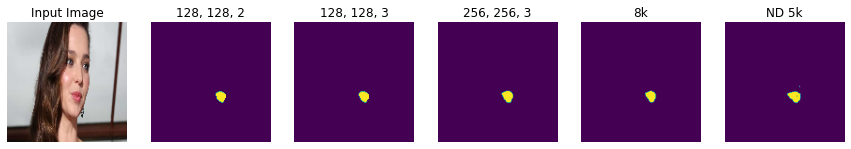

In [27]:
# Epoch 15 prediction result ( Female )
display( [female1.squeeze(), pred_female1, pred_female1_3c, pred_female1_256, pred_female1_8k, pred_female1_ND_5k] )
display( [female2.squeeze(), pred_female2, pred_female2_3c, pred_female2_256, pred_female2_8k, pred_female2_ND_5k] )
display( [female3.squeeze(), pred_female3, pred_female3_3c, pred_female3_256, pred_female3_8k, pred_female3_ND_5k] )
display( [female4.squeeze(), pred_female4, pred_female4_3c, pred_female4_256, pred_female4_8k, pred_female4_ND_5k] )


### Model Epoch 20

In [28]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer
model20_3c = tf.keras.models.load_model(model20_3c_path)

model20_256 = tf.keras.models.load_model(model20_256_path)

model20_8k = tf.keras.models.load_model(model20_8k_path)

model20_ND_5k = tf.keras.models.load_model(model20_ND_5k_path)

model20_ND_prunedQuant2 = tf.keras.models.load_model(model20_ND_prunedQuant2_path)

In [29]:
# Male
pred_image1_3c = model20_3c.predict(image1)
pred_image2_3c = model20_3c.predict(image2)
pred_image3_3c = model20_3c.predict(image3)
pred_image4_3c = model20_3c.predict(image4)

pred_image1_256 = model20_256.predict(image1_256)
pred_image2_256 = model20_256.predict(image2_256)
pred_image3_256 = model20_256.predict(image3_256)
pred_image4_256 = model20_256.predict(image4_256)

pred_image1_8k = model20_8k.predict(image1_256)
pred_image2_8k = model20_8k.predict(image2_256)
pred_image3_8k = model20_8k.predict(image3_256)
pred_image4_8k = model20_8k.predict(image4_256)

pred_image1_ND_5k = model20_ND_5k.predict(image1_256)
pred_image2_ND_5k = model20_ND_5k.predict(image2_256)
pred_image3_ND_5k = model20_ND_5k.predict(image3_256)
pred_image4_ND_5k = model20_ND_5k.predict(image4_256)

pred_image1_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(image1_256)
pred_image2_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(image2_256)
pred_image3_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(image3_256)
pred_image4_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(image4_256)

#Female
pred_female1_3c = model20_3c.predict(female1)
pred_female2_3c = model20_3c.predict(female2)
pred_female3_3c = model20_3c.predict(female3)
pred_female4_3c = model20_3c.predict(female4)

pred_female1_256 = model20_256.predict(female1_256)
pred_female2_256 = model20_256.predict(female2_256)
pred_female3_256 = model20_256.predict(female3_256)
pred_female4_256 = model20_256.predict(female4_256)

pred_female1_8k = model20_8k.predict(female1_256)
pred_female2_8k = model20_8k.predict(female2_256)
pred_female3_8k = model20_8k.predict(female3_256)
pred_female4_8k = model20_8k.predict(female4_256)

pred_female1_ND_5k = model20_ND_5k.predict(female1_256)
pred_female2_ND_5k = model20_ND_5k.predict(female2_256)
pred_female3_ND_5k = model20_ND_5k.predict(female3_256)
pred_female4_ND_5k = model20_ND_5k.predict(female4_256)

pred_female1_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(female1_256)
pred_female2_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(female2_256)
pred_female3_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(female3_256)
pred_female4_ND_prunedQuant2 = model20_ND_prunedQuant2.predict(female4_256)

In [30]:
# Male
pred_image1_3c = create_mask(pred_image1_3c)
pred_image2_3c = create_mask(pred_image2_3c)
pred_image3_3c = create_mask(pred_image3_3c)
pred_image4_3c = create_mask(pred_image4_3c)

pred_image1_256 = create_mask(pred_image1_256)
pred_image2_256 = create_mask(pred_image2_256)
pred_image3_256 = create_mask(pred_image3_256)
pred_image4_256 = create_mask(pred_image4_256)

pred_image1_8k = create_mask(pred_image1_8k)
pred_image2_8k = create_mask(pred_image2_8k)
pred_image3_8k = create_mask(pred_image3_8k)
pred_image4_8k = create_mask(pred_image4_8k)

pred_image1_ND_5k = create_mask(pred_image1_ND_5k)
pred_image2_ND_5k = create_mask(pred_image2_ND_5k)
pred_image3_ND_5k = create_mask(pred_image3_ND_5k)
pred_image4_ND_5k = create_mask(pred_image4_ND_5k)

pred_image1_ND_prunedQuant2 = create_mask(pred_image1_ND_prunedQuant2)
pred_image2_ND_prunedQuant2 = create_mask(pred_image2_ND_prunedQuant2)
pred_image3_ND_prunedQuant2 = create_mask(pred_image3_ND_prunedQuant2)
pred_image4_ND_prunedQuant2 = create_mask(pred_image4_ND_prunedQuant2)

#Female
pred_female1_3c = create_mask(pred_female1_3c)
pred_female2_3c = create_mask(pred_female2_3c)
pred_female3_3c = create_mask(pred_female3_3c)
pred_female4_3c = create_mask(pred_female4_3c)

pred_female1_256 = create_mask(pred_female1_256)
pred_female2_256 = create_mask(pred_female2_256)
pred_female3_256 = create_mask(pred_female3_256)
pred_female4_256 = create_mask(pred_female4_256)

pred_female1_8k = create_mask(pred_female1_8k)
pred_female2_8k = create_mask(pred_female2_8k)
pred_female3_8k = create_mask(pred_female3_8k)
pred_female4_8k = create_mask(pred_female4_8k)

pred_female1_ND_5k = create_mask(pred_female1_ND_5k)
pred_female2_ND_5k = create_mask(pred_female2_ND_5k)
pred_female3_ND_5k = create_mask(pred_female3_ND_5k)
pred_female4_ND_5k = create_mask(pred_female4_ND_5k)

pred_female1_ND_prunedQuant2 = create_mask(pred_female1_ND_prunedQuant2)
pred_female2_ND_prunedQuant2 = create_mask(pred_female2_ND_prunedQuant2)
pred_female3_ND_prunedQuant2 = create_mask(pred_female3_ND_prunedQuant2)
pred_female4_ND_prunedQuant2 = create_mask(pred_female4_ND_prunedQuant2)

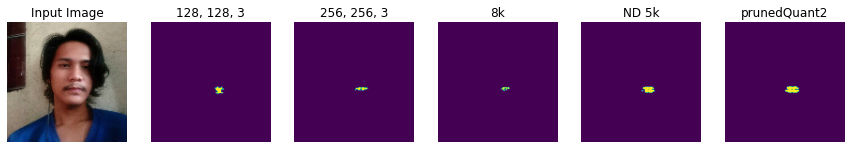

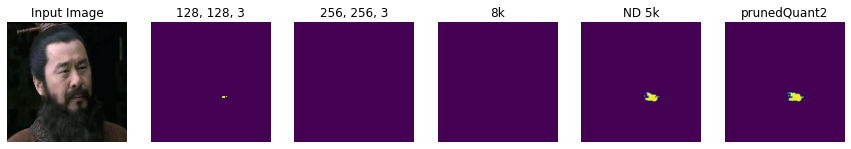

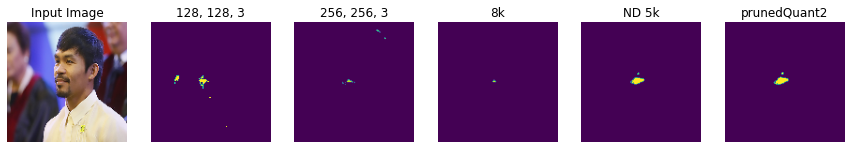

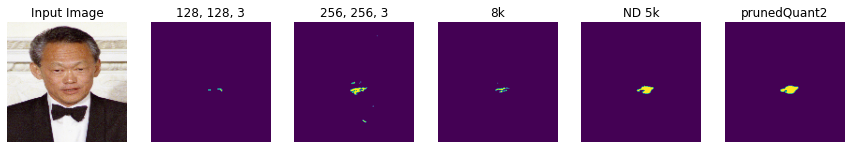

In [31]:
# Epoch 20 prediction result (Male)
display( [image1.squeeze(), pred_image1_3c, pred_image1_256, pred_image1_8k, pred_image1_ND_5k, pred_image1_ND_prunedQuant2] , [ "Input Image", "128, 128, 3", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"] )
display( [image2.squeeze(), pred_image2_3c, pred_image2_256, pred_image2_8k, pred_image2_ND_5k, pred_image2_ND_prunedQuant2] , [ "Input Image", "128, 128, 3", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])
display( [image3.squeeze(), pred_image3_3c, pred_image3_256, pred_image3_8k, pred_image3_ND_5k, pred_image3_ND_prunedQuant2] , [ "Input Image", "128, 128, 3", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])
display( [image4.squeeze(), pred_image4_3c, pred_image4_256, pred_image4_8k, pred_image4_ND_5k, pred_image4_ND_prunedQuant2] , [ "Input Image", "128, 128, 3", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])

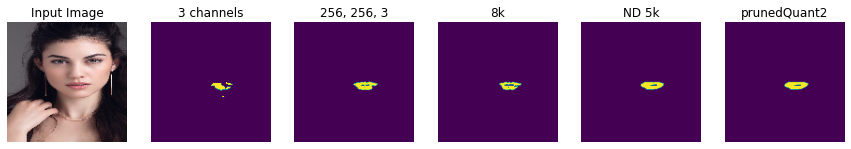

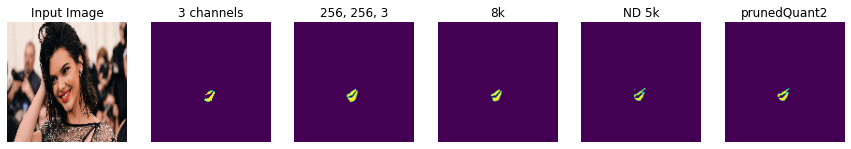

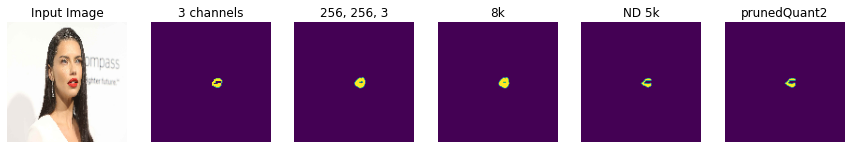

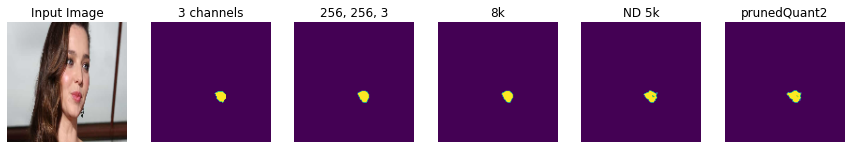

In [32]:
# Epoch 20 prediction result (Male)
display( [female1.squeeze(), pred_female1_3c, pred_female1_256, pred_female1_8k, pred_female1_ND_5k, pred_female1_ND_prunedQuant2] , [ "Input Image", "3 channels", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"] )
display( [female2.squeeze(), pred_female2_3c, pred_female2_256, pred_female2_8k, pred_female2_ND_5k, pred_female2_ND_prunedQuant2] , [ "Input Image", "3 channels", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])
display( [female3.squeeze(), pred_female3_3c, pred_female3_256, pred_female3_8k, pred_female3_ND_5k, pred_female3_ND_prunedQuant2] , [ "Input Image", "3 channels", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])
display( [female4.squeeze(), pred_female4_3c, pred_female4_256, pred_female4_8k, pred_female4_ND_5k, pred_female4_ND_prunedQuant2] , [ "Input Image", "3 channels", "256, 256, 3", "8k", "ND 5k", "prunedQuant2"])

### Model Epoch 25-30

In [33]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer
model25_ND_5k = tf.keras.models.load_model(model25_ND_5k_path)
model30_ND_5k = tf.keras.models.load_model(model30_ND_5k_path)

In [34]:
# Male
pred_image1_ND_5k_m25 = model25_ND_5k.predict(image1_256)
pred_image2_ND_5k_m25 = model25_ND_5k.predict(image2_256)
pred_image3_ND_5k_m25 = model25_ND_5k.predict(image3_256)
pred_image4_ND_5k_m25 = model25_ND_5k.predict(image4_256)

pred_image1_ND_5k_m30 = model30_ND_5k.predict(image1_256)
pred_image2_ND_5k_m30 = model30_ND_5k.predict(image2_256)
pred_image3_ND_5k_m30 = model30_ND_5k.predict(image3_256)
pred_image4_ND_5k_m30 = model30_ND_5k.predict(image4_256)

#Female
pred_female1_ND_5k_m25 = model25_ND_5k.predict(female1_256)
pred_female2_ND_5k_m25 = model25_ND_5k.predict(female2_256)
pred_female3_ND_5k_m25 = model25_ND_5k.predict(female3_256)
pred_female4_ND_5k_m25 = model25_ND_5k.predict(female4_256)

pred_female1_ND_5k_m30 = model30_ND_5k.predict(female1_256)
pred_female2_ND_5k_m30 = model30_ND_5k.predict(female2_256)
pred_female3_ND_5k_m30 = model30_ND_5k.predict(female3_256)
pred_female4_ND_5k_m30 = model30_ND_5k.predict(female4_256)

In [35]:
# Male
pred_image1_ND_5k_m25 = create_mask(pred_image1_ND_5k_m25)
pred_image2_ND_5k_m25 = create_mask(pred_image2_ND_5k_m25)
pred_image3_ND_5k_m25 = create_mask(pred_image3_ND_5k_m25)
pred_image4_ND_5k_m25 = create_mask(pred_image4_ND_5k_m25)

pred_image1_ND_5k_m30 = create_mask(pred_image1_ND_5k_m30)
pred_image2_ND_5k_m30 = create_mask(pred_image2_ND_5k_m30)
pred_image3_ND_5k_m30 = create_mask(pred_image3_ND_5k_m30)
pred_image4_ND_5k_m30 = create_mask(pred_image4_ND_5k_m30)

#Female
pred_female1_ND_5k_m25 = create_mask(pred_female1_ND_5k_m25)
pred_female2_ND_5k_m25 = create_mask(pred_female2_ND_5k_m25)
pred_female3_ND_5k_m25 = create_mask(pred_female3_ND_5k_m25)
pred_female4_ND_5k_m25 = create_mask(pred_female4_ND_5k_m25)

pred_female1_ND_5k_m30 = create_mask(pred_female1_ND_5k_m30)
pred_female2_ND_5k_m30 = create_mask(pred_female2_ND_5k_m30)
pred_female3_ND_5k_m30 = create_mask(pred_female3_ND_5k_m30)
pred_female4_ND_5k_m30 = create_mask(pred_female4_ND_5k_m30)

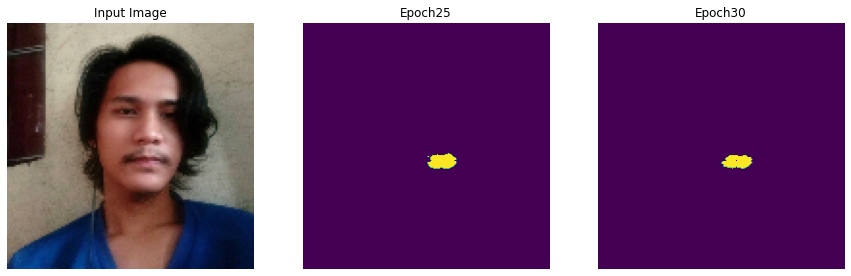

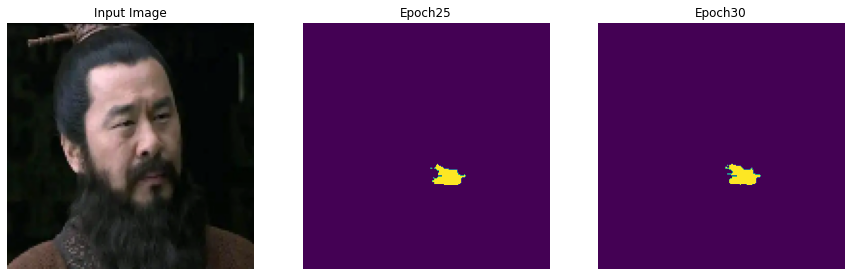

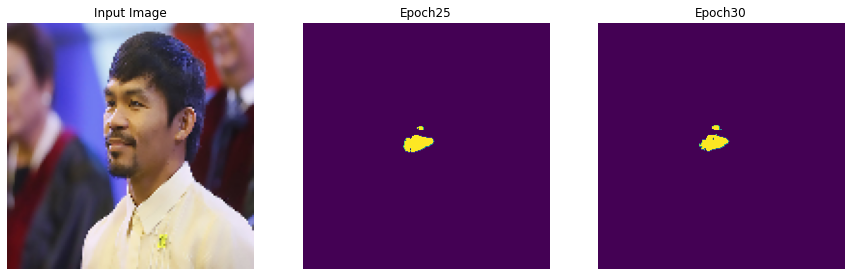

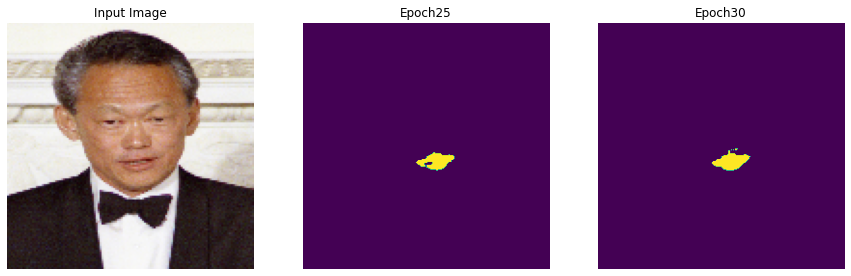

In [36]:
# Prediction result (Male)
display( [image1.squeeze(), pred_image1_ND_5k_m25, pred_image1_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [image2.squeeze(), pred_image2_ND_5k_m25, pred_image2_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [image3.squeeze(), pred_image3_ND_5k_m25, pred_image3_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [image4.squeeze(), pred_image4_ND_5k_m25, pred_image4_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )

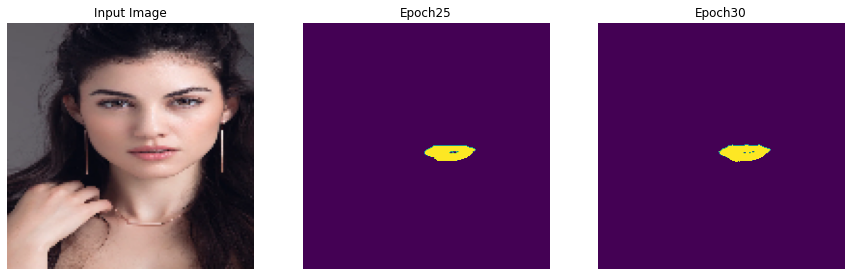

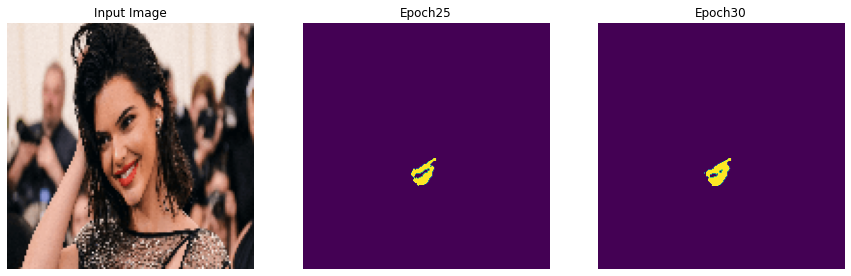

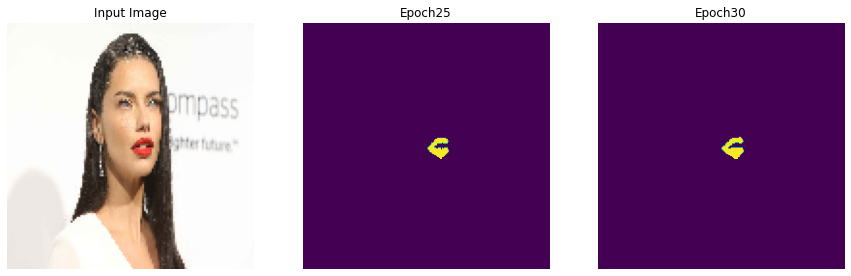

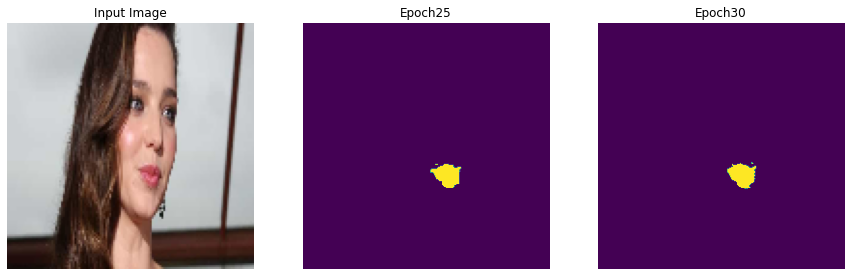

In [37]:
# Prediction result (Male)
display( [female1.squeeze(), pred_female1_ND_5k_m25, pred_female1_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [female2.squeeze(), pred_female2_ND_5k_m25, pred_female2_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [female3.squeeze(), pred_female3_ND_5k_m25, pred_female3_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )
display( [female4.squeeze(), pred_female4_ND_5k_m25, pred_female4_ND_5k_m30] , [ "Input Image", "Epoch25", "Epoch30"] )

## Tflite Model Tests

### PATHS

In [40]:
tflite_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k.tflite"

tflite_optimizeSize_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_optimizeSize.tflite"
tflite_default_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_default.tflite"
tflite_float16_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_float16.tflite"
tflite_uint8_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_uint8.tflite"

tflite_uint8_6mb_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_UINT8.tflite"

tflite_baseQuant_path = "/content/drive/MyDrive/Trained-Models/5k_NewDataset/Compress/Lips_Segmentation_Epoch20_Compressed_baseQuant.tflite"
tflite_prunedQuant_path = "/content/drive/MyDrive/Trained-Models/Pruning/Quantize/Lips_Segmentation_Epoch20_Compressed_prunedQuant.tflite"
tflite_prunedQuant3_path = "/content/drive/MyDrive/Trained-Models/Pruning/Quantize/Lips_Segmentation_Epoch20_Compressed_prunedQuant3.tflite"



# Below 6mb
tflite_2_77mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_removedKernel512.tflite"
tflite_2_27mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_2-27mb.tflite"
tflite_1_66mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_1-66mb.tflite"

tflite_1_41mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_1-41mb.tflite"
tflite_1_22mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_1-22mb.tflite"
tflite_1_016mb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_1-016mb.tflite"
tflite_335kb_path = "/content/drive/MyDrive/Trained-Models/Epoch20/Tflite/Lips_Segmentation_Model_Epoch20_ND_5k_335KB.tflite"


### Tflite Models

In [41]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer

tflite_model = tf.lite.Interpreter(model_path= tflite_path)

tflite_optimizeSize_model = tf.lite.Interpreter(model_path= tflite_optimizeSize_path)
tflite_default_model = tf.lite.Interpreter(model_path= tflite_default_path)
tflite_float16_model = tf.lite.Interpreter(model_path= tflite_float16_path)
tflite_uint8_model = tf.lite.Interpreter(model_path= tflite_uint8_path)

tflite_uint8_6mb_model = tf.lite.Interpreter(model_path= tflite_uint8_6mb_path)

tflite_baseQuant_model = tf.lite.Interpreter(model_path= tflite_baseQuant_path)
tflite_prunedQuant_model = tf.lite.Interpreter(model_path= tflite_prunedQuant_path)
tflite_prunedQuant3_model = tf.lite.Interpreter(model_path= tflite_prunedQuant3_path)

In [42]:
# Regular 24mb tflite model
pred_image1_tflite = tflite_infer( tflite_model, image1_256)
pred_image2_tflite = tflite_infer( tflite_model, image2_256)
pred_image3_tflite = tflite_infer( tflite_model, image3_256)
pred_image4_tflite = tflite_infer( tflite_model, image4_256)

pred_female1_tflite = tflite_infer( tflite_model, female1_256)
pred_female2_tflite = tflite_infer( tflite_model, female2_256)
pred_female3_tflite = tflite_infer( tflite_model, female3_256)
pred_female4_tflite = tflite_infer( tflite_model, female4_256)

# Optimmize for Size tflite model 6.55mb
pred_image1_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, image1_256)
pred_image2_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, image2_256)
pred_image3_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, image3_256)
pred_image4_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, image4_256)

pred_female1_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, female1_256)
pred_female2_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, female2_256)
pred_female3_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, female3_256)
pred_female4_tflite_optimizeSize = tflite_infer( tflite_optimizeSize_model, female4_256)

# Default optimization tflite model 6.55mb
pred_image1_tflite_default = tflite_infer( tflite_default_model, image1_256)
pred_image2_tflite_default = tflite_infer( tflite_default_model, image2_256)
pred_image3_tflite_default = tflite_infer( tflite_default_model, image3_256)
pred_image4_tflite_default = tflite_infer( tflite_default_model, image4_256)

pred_female1_tflite_default = tflite_infer( tflite_default_model, female1_256)
pred_female2_tflite_default = tflite_infer( tflite_default_model, female2_256)
pred_female3_tflite_default = tflite_infer( tflite_default_model, female3_256)
pred_female4_tflite_default = tflite_infer( tflite_default_model, female4_256)

# Float16 optimization tflite model 11mb
pred_image1_tflite_float16 = tflite_infer( tflite_float16_model, image1_256)
pred_image2_tflite_float16 = tflite_infer( tflite_float16_model, image2_256)
pred_image3_tflite_float16 = tflite_infer( tflite_float16_model, image3_256)
pred_image4_tflite_float16 = tflite_infer( tflite_float16_model, image4_256)

pred_female1_tflite_float16 = tflite_infer( tflite_float16_model, female1_256)
pred_female2_tflite_float16 = tflite_infer( tflite_float16_model, female2_256)
pred_female3_tflite_float16 = tflite_infer( tflite_float16_model, female3_256)
pred_female4_tflite_float16 = tflite_infer( tflite_float16_model, female4_256)

# uint8 optimization tflite model 24mb
pred_image1_tflite_uint8 = tflite_infer( tflite_uint8_model, image1_256)
pred_image2_tflite_uint8 = tflite_infer( tflite_uint8_model, image2_256)
pred_image3_tflite_uint8 = tflite_infer( tflite_uint8_model, image3_256)
pred_image4_tflite_uint8 = tflite_infer( tflite_uint8_model, image4_256)

pred_female1_tflite_uint8 = tflite_infer( tflite_uint8_model, female1_256)
pred_female2_tflite_uint8 = tflite_infer( tflite_uint8_model, female2_256)
pred_female3_tflite_uint8 = tflite_infer( tflite_uint8_model, female3_256)
pred_female4_tflite_uint8 = tflite_infer( tflite_uint8_model, female4_256)

# uint8 optimization tflite model 6mb
pred_image1_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, image1_uint8)
pred_image2_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, image2_uint8)
pred_image3_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, image3_uint8)
pred_image4_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, image4_uint8)

pred_female1_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, female1_uint8)
pred_female2_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, female2_uint8)
pred_female3_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, female3_uint8)
pred_female4_tflite_uint8_6mb = tflite_infer( tflite_uint8_6mb_model, female4_uint8)

# base Quant tflite model 19.94mb
pred_image1_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, image1_256)
pred_image2_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, image2_256)
pred_image3_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, image3_256)
pred_image4_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, image4_256)

pred_female1_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, female1_256)
pred_female2_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, female2_256)
pred_female3_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, female3_256)
pred_female4_tflite_baseQuant = tflite_infer( tflite_baseQuant_model, female4_256)

# pruned Quant tflite model 6.55mb (20 regular epoch + 2 pruned epoch)
pred_image1_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, image1_256)
pred_image2_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, image2_256)
pred_image3_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, image3_256)
pred_image4_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, image4_256)

pred_female1_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, female1_256)
pred_female2_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, female2_256)
pred_female3_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, female3_256)
pred_female4_tflite_prunedQuant = tflite_infer( tflite_prunedQuant_model, female4_256)

# pruned Quant 3 tflite model 6.55mb (20 regular epoch + 5 pruned epoch)
pred_image1_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, image1_256)
pred_image2_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, image2_256)
pred_image3_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, image3_256)
pred_image4_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, image4_256)

pred_female1_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, female1_256)
pred_female2_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, female2_256)
pred_female3_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, female3_256)
pred_female4_tflite_prunedQuant3 = tflite_infer( tflite_prunedQuant3_model, female4_256)

In [43]:
# Regular tflite model 24mb
pred_image1_tflite = create_mask(pred_image1_tflite)
pred_image2_tflite = create_mask(pred_image2_tflite)
pred_image3_tflite = create_mask(pred_image3_tflite)
pred_image4_tflite = create_mask(pred_image4_tflite)

pred_female1_tflite = create_mask(pred_female1_tflite)
pred_female2_tflite = create_mask(pred_female2_tflite)
pred_female3_tflite = create_mask(pred_female3_tflite)
pred_female4_tflite = create_mask(pred_female4_tflite)

# Optimize for Size tflite model 6.55mb
pred_image1_tflite_optimizeSize = create_mask(pred_image1_tflite_optimizeSize)
pred_image2_tflite_optimizeSize = create_mask(pred_image2_tflite_optimizeSize)
pred_image3_tflite_optimizeSize = create_mask(pred_image3_tflite_optimizeSize)
pred_image4_tflite_optimizeSize = create_mask(pred_image4_tflite_optimizeSize)

pred_female1_tflite_optimizeSize = create_mask(pred_female1_tflite_optimizeSize)
pred_female2_tflite_optimizeSize = create_mask(pred_female2_tflite_optimizeSize)
pred_female3_tflite_optimizeSize = create_mask(pred_female3_tflite_optimizeSize)
pred_female4_tflite_optimizeSize = create_mask(pred_female4_tflite_optimizeSize)

# Default optimization tflite model 6.55mb
pred_image1_tflite_default = create_mask(pred_image1_tflite_default)
pred_image2_tflite_default = create_mask(pred_image2_tflite_default)
pred_image3_tflite_default = create_mask(pred_image3_tflite_default)
pred_image4_tflite_default = create_mask(pred_image4_tflite_default)

pred_female1_tflite_default = create_mask(pred_female1_tflite_default)
pred_female2_tflite_default = create_mask(pred_female2_tflite_default)
pred_female3_tflite_default = create_mask(pred_female3_tflite_default)
pred_female4_tflite_default = create_mask(pred_female4_tflite_default)

# Float16 optimization tflite model 11mb
pred_image1_tflite_float16 = create_mask(pred_image1_tflite_float16)
pred_image2_tflite_float16 = create_mask(pred_image2_tflite_float16)
pred_image3_tflite_float16 = create_mask(pred_image3_tflite_float16)
pred_image4_tflite_float16 = create_mask(pred_image4_tflite_float16)

pred_female1_tflite_float16 = create_mask(pred_female1_tflite_float16)
pred_female2_tflite_float16 = create_mask(pred_female2_tflite_float16)
pred_female3_tflite_float16 = create_mask(pred_female3_tflite_float16)
pred_female4_tflite_float16 = create_mask(pred_female4_tflite_float16)

# uint8 optimization tflite model 24mb
pred_image1_tflite_uint8 = create_mask(pred_image1_tflite_uint8)
pred_image2_tflite_uint8 = create_mask(pred_image2_tflite_uint8)
pred_image3_tflite_uint8 = create_mask(pred_image3_tflite_uint8)
pred_image4_tflite_uint8 = create_mask(pred_image4_tflite_uint8)

pred_female1_tflite_uint8 = create_mask(pred_female1_tflite_uint8)
pred_female2_tflite_uint8 = create_mask(pred_female2_tflite_uint8)
pred_female3_tflite_uint8 = create_mask(pred_female3_tflite_uint8)
pred_female4_tflite_uint8 = create_mask(pred_female4_tflite_uint8)

# uint8 optimization tflite model 6mb
pred_image1_tflite_uint8_6mb = create_mask(pred_image1_tflite_uint8_6mb)
pred_image2_tflite_uint8_6mb = create_mask(pred_image2_tflite_uint8_6mb)
pred_image3_tflite_uint8_6mb = create_mask(pred_image3_tflite_uint8_6mb)
pred_image4_tflite_uint8_6mb = create_mask(pred_image4_tflite_uint8_6mb)

pred_female1_tflite_uint8_6mb = create_mask(pred_female1_tflite_uint8_6mb)
pred_female2_tflite_uint8_6mb = create_mask(pred_female2_tflite_uint8_6mb)
pred_female3_tflite_uint8_6mb = create_mask(pred_female3_tflite_uint8_6mb)
pred_female4_tflite_uint8_6mb = create_mask(pred_female4_tflite_uint8_6mb)

# base Quant tflite model 19mb
pred_image1_tflite_baseQuant = create_mask(pred_image1_tflite_baseQuant)
pred_image2_tflite_baseQuant = create_mask(pred_image2_tflite_baseQuant)
pred_image3_tflite_baseQuant = create_mask(pred_image3_tflite_baseQuant)
pred_image4_tflite_baseQuant = create_mask(pred_image4_tflite_baseQuant)

pred_female1_tflite_baseQuant = create_mask(pred_female1_tflite_baseQuant)
pred_female2_tflite_baseQuant = create_mask(pred_female2_tflite_baseQuant)
pred_female3_tflite_baseQuant = create_mask(pred_female3_tflite_baseQuant)
pred_female4_tflite_baseQuant = create_mask(pred_female4_tflite_baseQuant)

# pruned Quant tflite model 6.55mb (20 regular epoch + 2 pruned epoch)
pred_image1_tflite_prunedQuant = create_mask(pred_image1_tflite_prunedQuant)
pred_image2_tflite_prunedQuant = create_mask(pred_image2_tflite_prunedQuant)
pred_image3_tflite_prunedQuant = create_mask(pred_image3_tflite_prunedQuant)
pred_image4_tflite_prunedQuant = create_mask(pred_image4_tflite_prunedQuant)

pred_female1_tflite_prunedQuant = create_mask(pred_female1_tflite_prunedQuant)
pred_female2_tflite_prunedQuant = create_mask(pred_female2_tflite_prunedQuant)
pred_female3_tflite_prunedQuant = create_mask(pred_female3_tflite_prunedQuant)
pred_female4_tflite_prunedQuant = create_mask(pred_female4_tflite_prunedQuant)

# pruned Quant 3 tflite model 6.55mb (20 regular epoch + 5 pruned epoch)
pred_image1_tflite_prunedQuant3 = create_mask(pred_image1_tflite_prunedQuant3)
pred_image2_tflite_prunedQuant3 = create_mask(pred_image2_tflite_prunedQuant3)
pred_image3_tflite_prunedQuant3 = create_mask(pred_image3_tflite_prunedQuant3)
pred_image4_tflite_prunedQuant3 = create_mask(pred_image4_tflite_prunedQuant3)

pred_female1_tflite_prunedQuant3 = create_mask(pred_female1_tflite_prunedQuant3)
pred_female2_tflite_prunedQuant3 = create_mask(pred_female2_tflite_prunedQuant3)
pred_female3_tflite_prunedQuant3 = create_mask(pred_female3_tflite_prunedQuant3)
pred_female4_tflite_prunedQuant3 = create_mask(pred_female4_tflite_prunedQuant3)

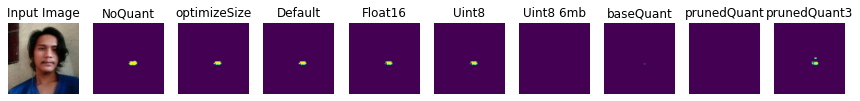

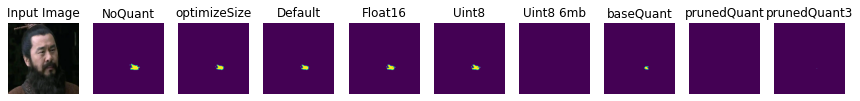

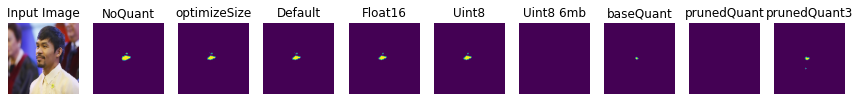

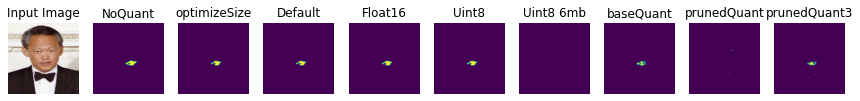

In [44]:
# Prediction result (Male)
display( [image1.squeeze(), pred_image1_tflite, pred_image1_tflite_optimizeSize, pred_image1_tflite_default, pred_image1_tflite_float16, pred_image1_tflite_uint8, pred_image1_tflite_uint8_6mb, pred_image1_tflite_baseQuant, pred_image1_tflite_prunedQuant, pred_image1_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [image2.squeeze(), pred_image2_tflite, pred_image2_tflite_optimizeSize, pred_image2_tflite_default, pred_image2_tflite_float16, pred_image2_tflite_uint8, pred_image2_tflite_uint8_6mb, pred_image2_tflite_baseQuant, pred_image2_tflite_prunedQuant, pred_image2_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [image3.squeeze(), pred_image3_tflite, pred_image3_tflite_optimizeSize, pred_image3_tflite_default, pred_image3_tflite_float16, pred_image3_tflite_uint8, pred_image3_tflite_uint8_6mb, pred_image3_tflite_baseQuant, pred_image3_tflite_prunedQuant, pred_image3_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [image4.squeeze(), pred_image4_tflite, pred_image4_tflite_optimizeSize, pred_image4_tflite_default, pred_image4_tflite_float16, pred_image4_tflite_uint8, pred_image4_tflite_uint8_6mb, pred_image4_tflite_baseQuant, pred_image4_tflite_prunedQuant, pred_image4_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )

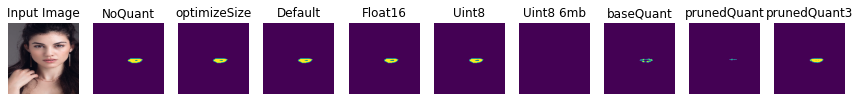

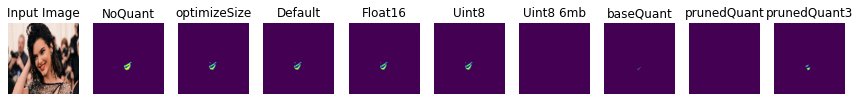

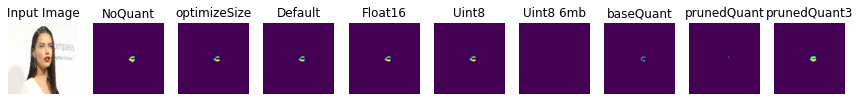

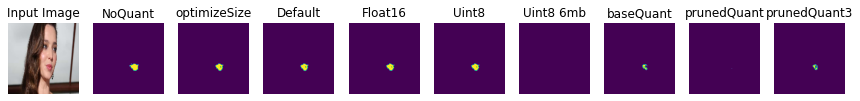

In [45]:
# Prediction result (Female)
display( [female1.squeeze(), pred_female1_tflite, pred_female1_tflite_optimizeSize, pred_female1_tflite_default, pred_female1_tflite_float16, pred_female1_tflite_uint8, pred_female1_tflite_uint8_6mb, pred_female1_tflite_baseQuant, pred_female1_tflite_prunedQuant, pred_female1_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [female2.squeeze(), pred_female2_tflite, pred_female2_tflite_optimizeSize, pred_female2_tflite_default, pred_female2_tflite_float16, pred_female2_tflite_uint8, pred_female1_tflite_uint8_6mb, pred_female2_tflite_baseQuant, pred_female2_tflite_prunedQuant, pred_female2_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [female3.squeeze(), pred_female3_tflite, pred_female3_tflite_optimizeSize, pred_female3_tflite_default, pred_female3_tflite_float16, pred_female3_tflite_uint8, pred_female1_tflite_uint8_6mb, pred_female3_tflite_baseQuant, pred_female3_tflite_prunedQuant, pred_female3_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )
display( [female4.squeeze(), pred_female4_tflite, pred_female4_tflite_optimizeSize, pred_female4_tflite_default, pred_female4_tflite_float16, pred_female4_tflite_uint8, pred_female1_tflite_uint8_6mb, pred_female4_tflite_baseQuant, pred_female4_tflite_prunedQuant, pred_female4_tflite_prunedQuant3] , [ "Input Image", "NoQuant", "optimizeSize", "Default", "Float16", "Uint8", "Uint8 6mb", "baseQuant", "prunedQuant", "prunedQuant3"] )

### Below 6mb

In [46]:
# Load models...
# Recreate the exact same model, including its weights and the optimizer

tflite_model_2_77mb = tf.lite.Interpreter(model_path= tflite_2_77mb_path)

tflite_model_2_27mb = tf.lite.Interpreter(model_path= tflite_2_27mb_path)

tflite_model_1_66mb = tf.lite.Interpreter(model_path= tflite_1_66mb_path)

tflite_model_1_41mb = tf.lite.Interpreter(model_path= tflite_1_41mb_path)

tflite_model_1_22mb = tf.lite.Interpreter(model_path= tflite_1_22mb_path)

tflite_model_1_016mb = tf.lite.Interpreter(model_path= tflite_1_016mb_path)

tflite_model_335kb = tf.lite.Interpreter(model_path= tflite_335kb_path)

In [47]:
# Regular 2.77mb tflite model
pred_image1_2_77mb = tflite_infer( tflite_model_2_77mb, image1_256)
pred_image2_2_77mb = tflite_infer( tflite_model_2_77mb, image2_256)
pred_image3_2_77mb = tflite_infer( tflite_model_2_77mb, image3_256)
pred_image4_2_77mb = tflite_infer( tflite_model_2_77mb, image4_256)

pred_female1_2_77mb = tflite_infer( tflite_model_2_77mb, female1_256)
pred_female2_2_77mb = tflite_infer( tflite_model_2_77mb, female2_256)
pred_female3_2_77mb = tflite_infer( tflite_model_2_77mb, female3_256)
pred_female4_2_77mb = tflite_infer( tflite_model_2_77mb, female4_256)

# Regular 2.27mb tflite model
pred_image1_2_27mb = tflite_infer( tflite_model_2_27mb, image1_256)
pred_image2_2_27mb = tflite_infer( tflite_model_2_27mb, image2_256)
pred_image3_2_27mb = tflite_infer( tflite_model_2_27mb, image3_256)
pred_image4_2_27mb = tflite_infer( tflite_model_2_27mb, image4_256)

pred_female1_2_27mb = tflite_infer( tflite_model_2_27mb, female1_256)
pred_female2_2_27mb = tflite_infer( tflite_model_2_27mb, female2_256)
pred_female3_2_27mb = tflite_infer( tflite_model_2_27mb, female3_256)
pred_female4_2_27mb = tflite_infer( tflite_model_2_27mb, female4_256)

# Regular 1.66mb tflite model
pred_image1_1_66mb = tflite_infer( tflite_model_1_66mb, image1_256)
pred_image2_1_66mb = tflite_infer( tflite_model_1_66mb, image2_256)
pred_image3_1_66mb = tflite_infer( tflite_model_1_66mb, image3_256)
pred_image4_1_66mb = tflite_infer( tflite_model_1_66mb, image4_256)

pred_female1_1_66mb = tflite_infer( tflite_model_1_66mb, female1_256)
pred_female2_1_66mb = tflite_infer( tflite_model_1_66mb, female2_256)
pred_female3_1_66mb = tflite_infer( tflite_model_1_66mb, female3_256)
pred_female4_1_66mb = tflite_infer( tflite_model_1_66mb, female4_256)

# 1.41mb
pred_image1_1_41mb = tflite_infer( tflite_model_1_41mb, image1_256)
pred_image2_1_41mb = tflite_infer( tflite_model_1_41mb, image2_256)
pred_image3_1_41mb = tflite_infer( tflite_model_1_41mb, image3_256)
pred_image4_1_41mb = tflite_infer( tflite_model_1_41mb, image4_256)

pred_female1_1_41mb = tflite_infer( tflite_model_1_41mb, female1_256)
pred_female2_1_41mb = tflite_infer( tflite_model_1_41mb, female2_256)
pred_female3_1_41mb = tflite_infer( tflite_model_1_41mb, female3_256)
pred_female4_1_41mb = tflite_infer( tflite_model_1_41mb, female4_256)

# 1.22mb
pred_image1_1_22mb = tflite_infer( tflite_model_1_22mb, image1_256)
pred_image2_1_22mb = tflite_infer( tflite_model_1_22mb, image2_256)
pred_image3_1_22mb = tflite_infer( tflite_model_1_22mb, image3_256)
pred_image4_1_22mb = tflite_infer( tflite_model_1_22mb, image4_256)

pred_female1_1_22mb = tflite_infer( tflite_model_1_22mb, female1_256)
pred_female2_1_22mb = tflite_infer( tflite_model_1_22mb, female2_256)
pred_female3_1_22mb = tflite_infer( tflite_model_1_22mb, female3_256)
pred_female4_1_22mb = tflite_infer( tflite_model_1_22mb, female4_256)

# 1.016mb
pred_image1_1_016mb = tflite_infer( tflite_model_1_016mb, image1_256)
pred_image2_1_016mb = tflite_infer( tflite_model_1_016mb, image2_256)
pred_image3_1_016mb = tflite_infer( tflite_model_1_016mb, image3_256)
pred_image4_1_016mb = tflite_infer( tflite_model_1_016mb, image4_256)

pred_female1_1_016mb = tflite_infer( tflite_model_1_016mb, female1_256)
pred_female2_1_016mb = tflite_infer( tflite_model_1_016mb, female2_256)
pred_female3_1_016mb = tflite_infer( tflite_model_1_016mb, female3_256)
pred_female4_1_016mb = tflite_infer( tflite_model_1_016mb, female4_256)

# 335kb
pred_image1_335kb = tflite_infer( tflite_model_335kb, image1_256)
pred_image2_335kb = tflite_infer( tflite_model_335kb, image2_256)
pred_image3_335kb = tflite_infer( tflite_model_335kb, image3_256)
pred_image4_335kb = tflite_infer( tflite_model_335kb, image4_256)

pred_female1_335kb = tflite_infer( tflite_model_335kb, female1_256)
pred_female2_335kb = tflite_infer( tflite_model_335kb, female2_256)
pred_female3_335kb = tflite_infer( tflite_model_335kb, female3_256)
pred_female4_335kb = tflite_infer( tflite_model_335kb, female4_256)

In [48]:
# Regular tflite model 2.77mb
pred_image1_2_77mb = create_mask(pred_image1_2_77mb)
pred_image2_2_77mb = create_mask(pred_image2_2_77mb)
pred_image3_2_77mb = create_mask(pred_image3_2_77mb)
pred_image4_2_77mb = create_mask(pred_image4_2_77mb)

pred_female1_2_77mb = create_mask(pred_female1_2_77mb)
pred_female2_2_77mb = create_mask(pred_female2_2_77mb)
pred_female3_2_77mb = create_mask(pred_female3_2_77mb)
pred_female4_2_77mb = create_mask(pred_female4_2_77mb)

# Regular tflite model 2.27mb
pred_image1_2_27mb = create_mask(pred_image1_2_27mb)
pred_image2_2_27mb = create_mask(pred_image2_2_27mb)
pred_image3_2_27mb = create_mask(pred_image3_2_27mb)
pred_image4_2_27mb = create_mask(pred_image4_2_27mb)

pred_female1_2_27mb = create_mask(pred_female1_2_27mb)
pred_female2_2_27mb = create_mask(pred_female2_2_27mb)
pred_female3_2_27mb = create_mask(pred_female3_2_27mb)
pred_female4_2_27mb = create_mask(pred_female4_2_27mb)

# Regular tflite model 1.66mb
pred_image1_1_66mb = create_mask(pred_image1_1_66mb)
pred_image2_1_66mb = create_mask(pred_image2_1_66mb)
pred_image3_1_66mb = create_mask(pred_image3_1_66mb)
pred_image4_1_66mb = create_mask(pred_image4_1_66mb)

pred_female1_1_66mb = create_mask(pred_female1_1_66mb)
pred_female2_1_66mb = create_mask(pred_female2_1_66mb)
pred_female3_1_66mb = create_mask(pred_female3_1_66mb)
pred_female4_1_66mb = create_mask(pred_female4_1_66mb)

# 1.41
pred_image1_1_41mb = create_mask(pred_image1_1_41mb)
pred_image2_1_41mb = create_mask(pred_image2_1_41mb)
pred_image3_1_41mb = create_mask(pred_image3_1_41mb)
pred_image4_1_41mb = create_mask(pred_image4_1_41mb)

pred_female1_1_41mb = create_mask(pred_female1_1_41mb)
pred_female2_1_41mb = create_mask(pred_female2_1_41mb)
pred_female3_1_41mb = create_mask(pred_female3_1_41mb)
pred_female4_1_41mb = create_mask(pred_female4_1_41mb)

# 1.22mb
pred_image1_1_22mb = create_mask(pred_image1_1_22mb)
pred_image2_1_22mb = create_mask(pred_image2_1_22mb)
pred_image3_1_22mb = create_mask(pred_image3_1_22mb)
pred_image4_1_22mb = create_mask(pred_image4_1_22mb)

pred_female1_1_22mb = create_mask(pred_female1_1_22mb)
pred_female2_1_22mb = create_mask(pred_female2_1_22mb)
pred_female3_1_22mb = create_mask(pred_female3_1_22mb)
pred_female4_1_22mb = create_mask(pred_female4_1_22mb)

# 1.016mb
pred_image1_1_016mb = create_mask(pred_image1_1_016mb)
pred_image2_1_016mb = create_mask(pred_image2_1_016mb)
pred_image3_1_016mb = create_mask(pred_image3_1_016mb)
pred_image4_1_016mb = create_mask(pred_image4_1_016mb)

pred_female1_1_016mb = create_mask(pred_female1_1_016mb)
pred_female2_1_016mb = create_mask(pred_female2_1_016mb)
pred_female3_1_016mb = create_mask(pred_female3_1_016mb)
pred_female4_1_016mb = create_mask(pred_female4_1_016mb)

# 335kb
pred_image1_335kb = create_mask(pred_image1_335kb)
pred_image2_335kb = create_mask(pred_image2_335kb)
pred_image3_335kb = create_mask(pred_image3_335kb)
pred_image4_335kb = create_mask(pred_image4_335kb)

pred_female1_335kb = create_mask(pred_female1_335kb)
pred_female2_335kb = create_mask(pred_female2_335kb)
pred_female3_335kb = create_mask(pred_female3_335kb)
pred_female4_335kb = create_mask(pred_female4_335kb)

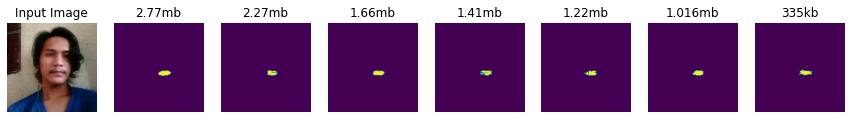

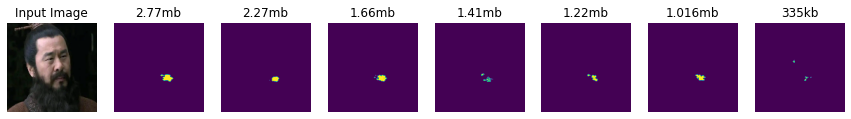

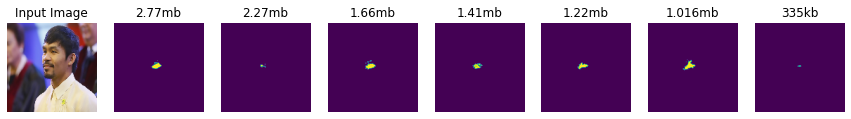

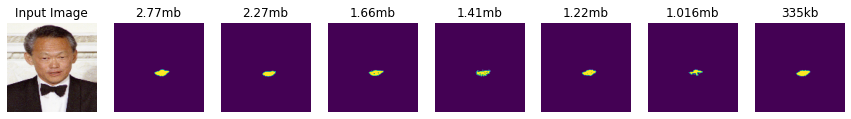

In [52]:
# Prediction result (Male)
display( [image1.squeeze(), pred_image1_2_77mb, pred_image1_2_27mb, pred_image1_1_66mb, pred_image1_1_41mb, pred_image1_1_22mb, pred_image1_1_016mb, pred_image1_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [image2.squeeze(), pred_image2_2_77mb, pred_image2_2_27mb, pred_image2_1_66mb, pred_image2_1_41mb, pred_image2_1_22mb, pred_image2_1_016mb, pred_image2_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [image3.squeeze(), pred_image3_2_77mb, pred_image3_2_27mb, pred_image3_1_66mb, pred_image3_1_41mb, pred_image3_1_22mb, pred_image3_1_016mb, pred_image3_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [image4.squeeze(), pred_image4_2_77mb, pred_image4_2_27mb, pred_image4_1_66mb, pred_image4_1_41mb, pred_image4_1_22mb, pred_image4_1_016mb, pred_image4_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )


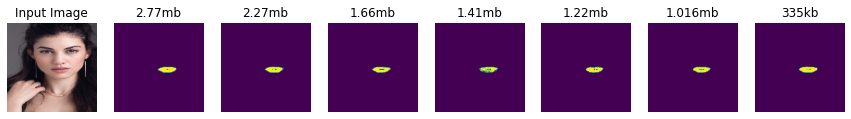

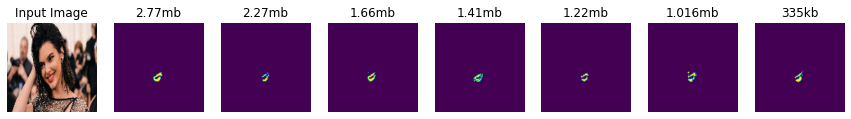

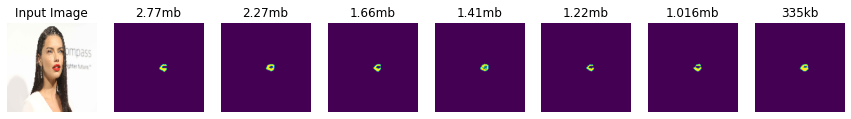

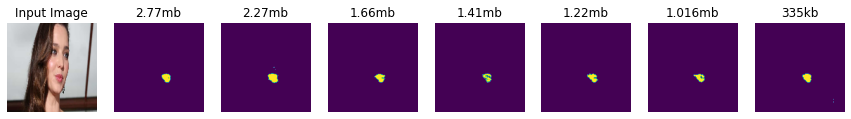

In [51]:
# Prediction result (Female)
display( [female1.squeeze(), pred_female1_2_77mb, pred_female1_2_27mb, pred_female1_1_66mb, pred_female1_1_41mb, pred_female1_1_22mb, pred_female1_1_016mb, pred_female1_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [female2.squeeze(), pred_female2_2_77mb, pred_female2_2_27mb, pred_female2_1_66mb, pred_female2_1_41mb, pred_female2_1_22mb, pred_female2_1_016mb, pred_female2_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [female3.squeeze(), pred_female3_2_77mb, pred_female3_2_27mb, pred_female3_1_66mb, pred_female3_1_41mb, pred_female3_1_22mb, pred_female3_1_016mb, pred_female3_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
display( [female4.squeeze(), pred_female4_2_77mb, pred_female4_2_27mb, pred_female4_1_66mb, pred_female4_1_41mb, pred_female4_1_22mb, pred_female4_1_016mb, pred_female4_335kb] , [ "Input Image", "2.77mb", "2.27mb", "1.66mb", "1.41mb", "1.22mb", "1.016mb", "335kb"] )
